In [1]:
#Import important packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized

In [2]:
def dist_circle(xc, yc, s):
    """
    Returns an array in which the value of each element is its distance from
    a specified center. Useful for masking inside a circular aperture.

    The (xc, yc) coordinates are the ones one can read on the figure axes
    e.g. when plotting the result of my find_galaxy() procedure.

    """
    x, y = np.ogrid[:s[0], :s[1]] - np.array([yc, xc])  # note yc before xc
    rad = np.sqrt(x**2 + y**2)

    return rad

In [3]:
#Open the file with the psf

path = '/home/carlos/Desktop/SDP/Dynamics/HST Data Reduction/Data/' #Caminho da imagem
file = path+'F160W_centerized.fits'
hdu = fits.open(file) #Abrindo imagem
img = hdu[1].data #Pega os dados da img
img_data = hdu[1].data #Pega os dados da img

where_are_NaNs = np.isnan(img)
img[where_are_NaNs] = 0

In [4]:
#Proporties of the image

minlevel = 0.4    #counts/px
sky = 0.3         #counts/px
scale = 0.09      #arcsec/pxz
img = img - sky

In [5]:
#MGE PSF for F160w, after build an ePSF with DAOPHOT

normpsf, sigmapsf = np.loadtxt("Psf_model.txt", unpack=True)

print(normpsf.sum()) # Should total(normpsf)=1

1.0


 Pixels used: 2748
 Peak Img[j, k]: 86 70
 Mean (j, k): 85.60 70.56
 Theta (deg): 78.1
 Astro PA (deg): 11.9
 Eps: 0.200
 Major axis (pix): 34.9


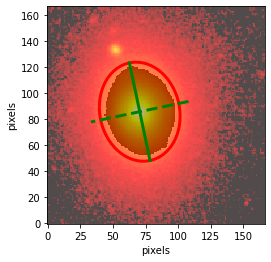

In [6]:
    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
plt.clf()
f = find_galaxy(img, fraction=0.1, plot=1)

In [7]:
r = dist_circle(52, 133, img.shape)  # 
mask = r > 7                        

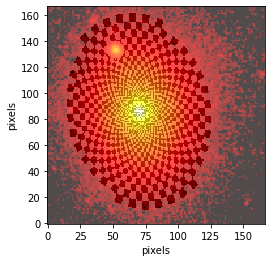

In [8]:
# Perform galaxy photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=0.02, plot=1, mask=mask)

Iteration: 1  chi2: 1.317  Nonzero: 9/30
Iteration: 11  chi2: 0.5323  Nonzero: 9/30
Nonzero Gaussians: 10/30
Eliminating not useful Gaussians...
ngauss: 9           chi2: 0.508
ngauss: 8           chi2: 0.51
Starting nonlinear fit...
Iteration: 1  chi2: 0.5097  Nonzero: 8/8
Nonzero Gaussians: 8/8
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 3.36 seconds
  Total Iterations:  20
 Nonzero Gaussians:  8
  Unused Gaussians:  22
 Sectors used in the fit:  19
 Total number of points fitted:  511
 Chi2: 0.506 
 STDEV: 0.03145 
 MEANABSDEV: 0.02083 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      111.378     0.507669     0.705563
      275.652      1.39269      0.59499
       214.76      3.00115     0.816137
      488.994       6.5287            1
      140.797      8.07731     0.441468
      524.646      13.5541            1
   

Iteration: 11  chi2: 0.5323  Nonzero: 9/30
Nonzero Gaussians: 8/30
Eliminating not useful Gaussians...
Starting nonlinear fit...
Iteration: 1  chi2: 0.5079  Nonzero: 8/8
Nonzero Gaussians: 8/8
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 2.63 seconds
  Total Iterations:  15
 Nonzero Gaussians:  8
  Unused Gaussians:  22
 Sectors used in the fit:  19
 Total number of points fitted:  511
 Chi2: 0.506 
 STDEV: 0.03145 
 MEANABSDEV: 0.02083 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      111.736     0.507669     0.705229
      275.052      1.39198     0.594402
      214.982      2.99947     0.816056
      488.955      6.52871            1
      140.913      8.07694     0.441717
      524.569      13.5541            1
        469.8      19.9431     0.597951
      933.377      36.1719     0.784573
++++++++++++++++++++++++++++

Iteration: 11  chi2: 0.6397  Nonzero: 8/30
Iteration: 21  chi2: 0.5905  Nonzero: 9/30
Nonzero Gaussians: 9/30
Eliminating not useful Gaussians...
ngauss: 8           chi2: 0.593
Starting nonlinear fit...
Iteration: 1  chi2: 0.5929  Nonzero: 8/8
Nonzero Gaussians: 8/8
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 3.64 seconds
  Total Iterations:  22
 Nonzero Gaussians:  8
  Unused Gaussians:  22
 Sectors used in the fit:  19
 Total number of points fitted:  511
 Chi2: 0.589 
 STDEV: 0.03393 
 MEANABSDEV: 0.02333 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
      137.979     0.507669     0.719951
      257.576      1.44518          0.7
      202.187       3.0644     0.739902
      283.228      6.76183          0.7
      356.237      6.94398            1
      318.954      12.9774            1
      657.982      18.1183       

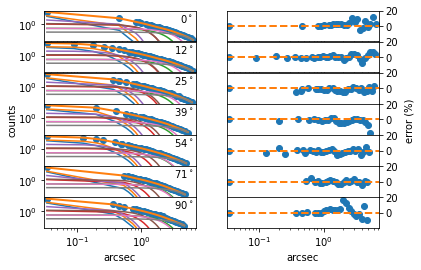

In [9]:
# Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************
plt.clf()
m = mge_fit_sectors_regularized(s.radius, s.angle, s.counts, f.eps,
                       ngauss= 30, sigmapsf=sigmapsf, normpsf=normpsf,
                        scale=scale, plot=1, bulge_disk=0, linear=0)

<Figure size 432x288 with 0 Axes>

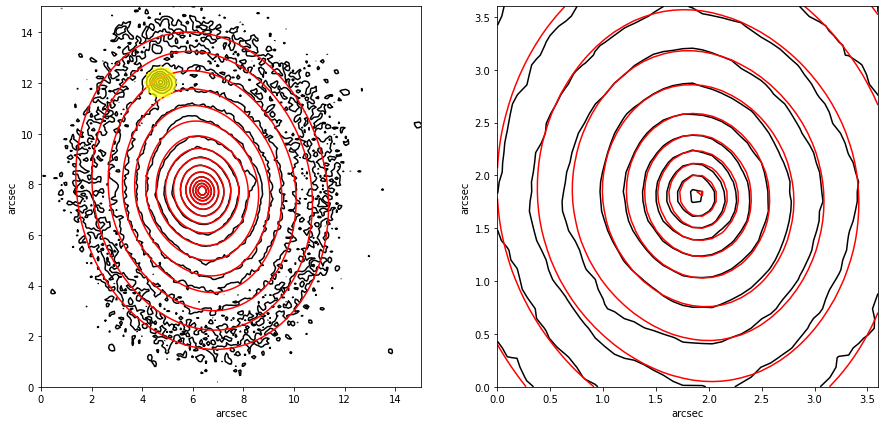

In [10]:
plt.clf()
plt.figure(figsize=(15,15))
plt.subplot(121)
ctc, model = mge_print_contours(img, f.theta, f.xpeak-0.45, f.ypeak+0.35, m.sol, scale=scale,
                        sigmapsf=sigmapsf, normpsf=normpsf, magrange=8, mask=mask)


n = 20
img_sub = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
ctc2, model2 = mge_print_contours(img_sub, f.theta, xc, yc, m.sol,
                       sigmapsf=sigmapsf, normpsf=normpsf, scale=scale)

plt.show()

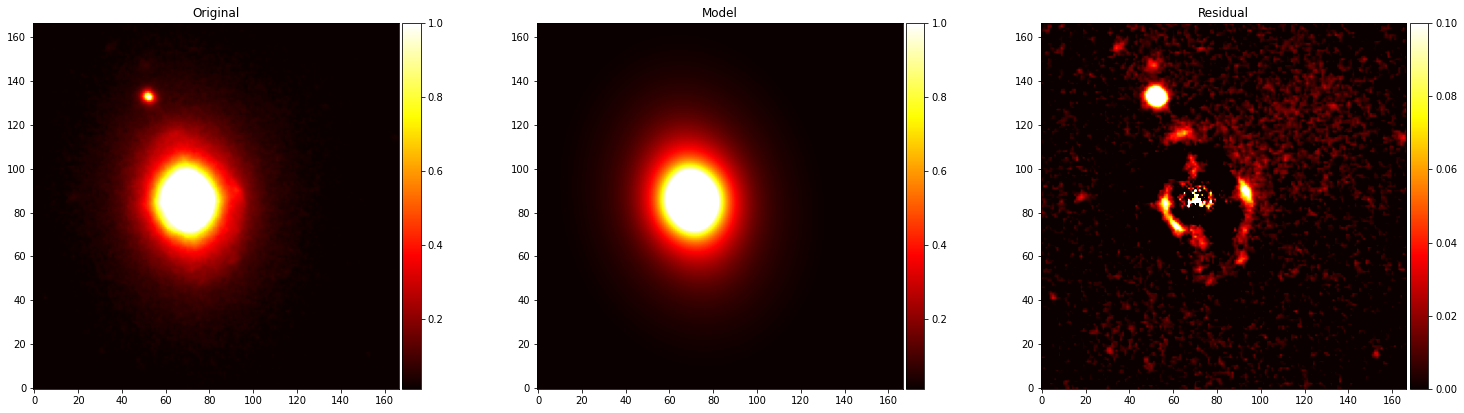

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(1,3, figsize=(25, 7))
plt.subplots_adjust(hspace=0.0, wspace=0.3)

#Image
origial_plt = axes[0].imshow(img, origin='lower', vmin=0.0123, vmax=1., cmap="hot")
axes[0].set_title("Original")

divider = make_axes_locatable(axes=axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(origial_plt, ax=axes[0], cax=cax)


#Model
model_plt = axes[1].imshow(model, origin='lower',vmin=0.0123, vmax=1., cmap="hot")
axes[1].set_title("Model")

divider = make_axes_locatable(axes=axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(model_plt, ax=axes[1], cax=cax)


#Residual
diff_plt = axes[2].imshow(img - model, origin='lower', vmin=0, vmax=0.1, cmap="hot")
axes[2].set_title("Residual")

divider = make_axes_locatable(axes=axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(diff_plt, ax=axes[2], cax=cax)

plt.savefig("/home/carlos/Desktop/SDP/Dynamics/HST Data Reduction/Figs/SDP81_MGE_with_arcs.png",
                    fmt="png", bbox_inches='tight', dpi=200)

In [13]:
# Save model and diff in fits files


fits.writeto(filename=path+"F160w_model.fits", data=model, overwrite=True)
fits.writeto(filename=path+"F160w_difference.fits", data=(img - model), overwrite=True)

In [14]:
#Save MGE components
np.savetxt('MGE_Output_with_arcs.txt', np.column_stack([m.sol[0], m.sol[1], m.sol[2]]),
           fmt=b'\t%10.6f\t %10.6f\t %10.6f\t ', 
           header='\tTotal_Counts\t Sigma_Pixels\t     qObs\t', delimiter='\t')